In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('IMDB-Movie-Data.csv')
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
data.shape

(1000, 12)

In [5]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [6]:
data[data.duplicated()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


## DATA ANALYSIS

In [7]:
# Movies with more than 3 hours runtime
data[data['Runtime (Minutes)']>180]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
88,89,The Hateful Eight,"Crime,Drama,Mystery","In the dead of a Wyoming winter, a bounty hunt...",Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",2015,187,7.8,341170,54.12,68.0
828,829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,25.03,NaN


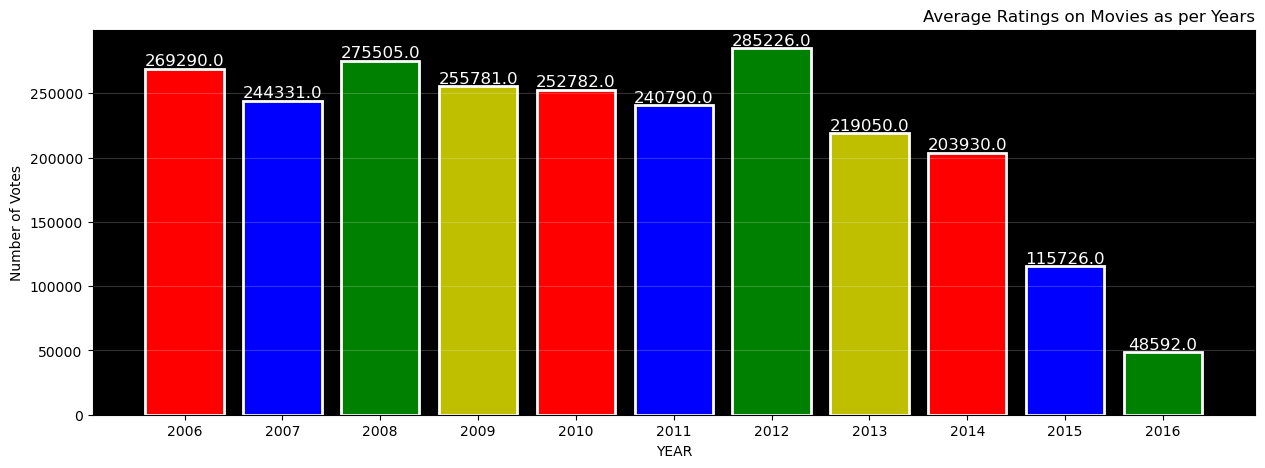

In [8]:
# In Which Year There Was The Highest Average Voting?
plt.figure(figsize=(15,5))
ax = plt.axes()
ax.set_facecolor('k')
plt.grid(axis='y',alpha=.2,color='w')
Votes = plt.bar(data.groupby('Year')['Votes'].mean().keys(),data.groupby('Year')['Votes'].mean(),\
                color=['r','b','g','y'],ec='w',lw=2)
plt.bar_label(Votes,round(data.groupby('Year')['Votes'].mean()),c='w',size=12)
plt.xticks(data.groupby('Year')['Votes'].mean().keys())
plt.xlabel('YEAR')
plt.ylabel('Number of Votes')
plt.title('Average Ratings on Movies as per Years',loc='right')
plt.show()

In [9]:
# Director with most movies
data.groupby('Director').size().sort_values(ascending=False)[:5]

Director
Ridley Scott          8
M. Night Shyamalan    6
David Yates           6
Michael Bay           6
Paul W.S. Anderson    6
dtype: int64

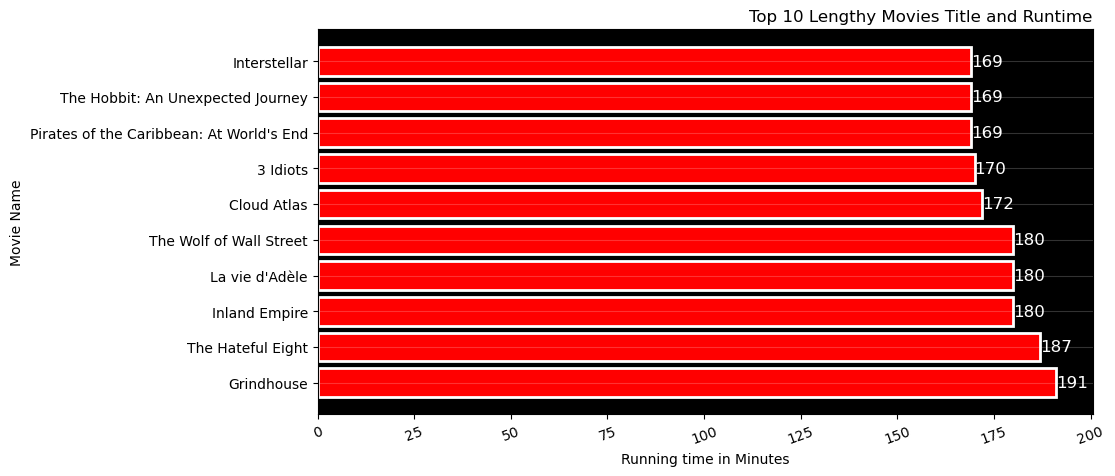

In [10]:
# Display Top 10 Lengthy Movies Title and Runtime
Lenghty_movies = data.sort_values(by='Runtime (Minutes)',ascending=False)[:10]
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor('k')
plt.grid(axis='y',alpha=.2,color='w')
Movies = plt.barh(Lenghty_movies['Title'],Lenghty_movies['Runtime (Minutes)'],\
                color='r',ec='w',lw=2)
plt.bar_label(Movies,Lenghty_movies['Runtime (Minutes)'],c='w',size=12)
plt.xticks(rotation=20)
plt.xlabel('Running time in Minutes')
plt.ylabel('Movie Name')
plt.title('Top 10 Lengthy Movies Title and Runtime',loc='right')
plt.show()

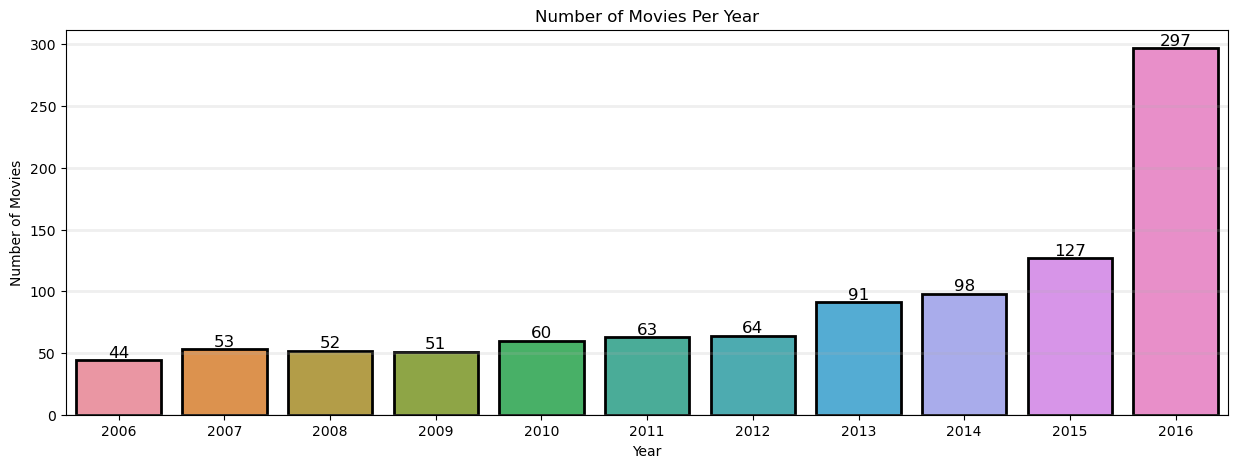

In [11]:
# Display Number of Movies Per Year
fig,ax = plt.subplots(figsize=(15,5))
sns.countplot(x='Year',data=data,ec='k',lw=2,ax=ax)
ax.bar_label(ax.containers[0],fontsize=12)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Per Year',loc='center')
plt.grid('w',lw=2,axis='y',alpha=.2)
plt.show()

In [12]:
# Find Most Popular Movie Title (Highest Revenue)
data.sort_values(by='Revenue (Millions)',ascending=False)[:1][['Title','Director','Revenue (Millions)','Year']]

,Title,Director,Revenue (Millions),Year
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,936.63,2015


In [13]:
# Display Top 10 Highest Rated Movie Titles And its Directors
data.sort_values(by='Rating',ascending=False)[:10][['Title','Director','Rating','Year']]

,Title,Director,Rating,Year
54,The Dark Knight,Christopher Nolan,9.0,2008
80,Inception,Christopher Nolan,8.8,2010
117,Dangal,Nitesh Tiwari,8.8,2016
36,Interstellar,Christopher Nolan,8.6,2014
96,Kimi no na wa,Makoto Shinkai,8.6,2016
249,The Intouchables,Olivier Nakache,8.6,2011
133,Whiplash,Damien Chazelle,8.5,2014
64,The Prestige,Christopher Nolan,8.5,2006
99,The Departed,Martin Scorsese,8.5,2006
991,Taare Zameen Par,Aamir Khan,8.5,2007


In [14]:
# Display Top 10 Highest Revenue Movie Titles
data.sort_values(by='Revenue (Millions)',ascending=False)[:10][['Title','Director','Revenue (Millions)','Year']]

,Title,Director,Revenue (Millions),Year
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,936.63,2015
87,Avatar,James Cameron,760.51,2009
85,Jurassic World,Colin Trevorrow,652.18,2015
76,The Avengers,Joss Whedon,623.28,2012
54,The Dark Knight,Christopher Nolan,533.32,2008
12,Rogue One,Gareth Edwards,532.17,2016
119,Finding Dory,Andrew Stanton,486.29,2016
94,Avengers: Age of Ultron,Joss Whedon,458.99,2015
124,The Dark Knight Rises,Christopher Nolan,448.13,2012
578,The Hunger Games: Catching Fire,Francis Lawrence,424.65,2013


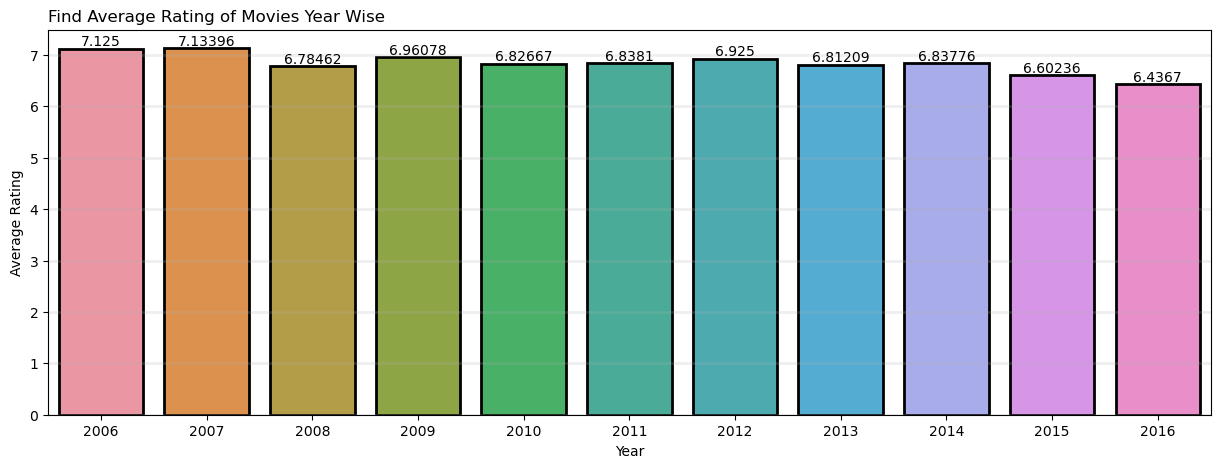

In [15]:
# Find Average Rating of Movies Year Wise
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(data.groupby('Year')['Rating'].mean().keys(),data.groupby('Year')['Rating'].mean(),ec='k',lw=2,ax=ax)
ax.bar_label(ax.containers[0],fontsize=10)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Find Average Rating of Movies Year Wise',loc='left')
plt.grid('w',lw=2,axis='y',alpha=.2)
plt.show()

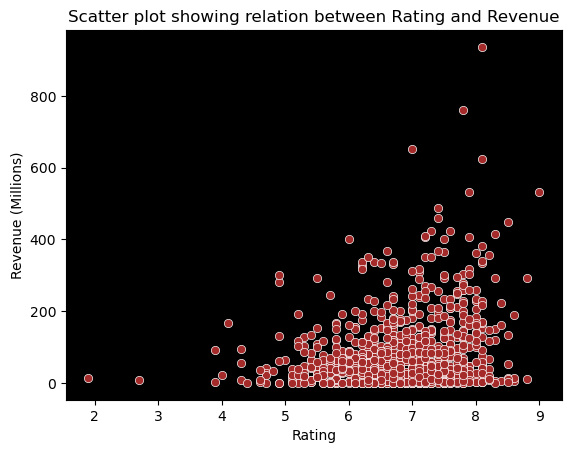

In [16]:
# Does Rating Affect The Revenue?
ax = plt.axes()
ax.set_facecolor('k')
sns.scatterplot(data['Rating'],data['Revenue (Millions)'],color='brown',ec='w',lw=3)
plt.title('Scatter plot showing relation between Rating and Revenue')
plt.show()

In [17]:
print('As seen in scatterplot and correlation the Rating do affects the Revenue')
data[['Rating','Revenue (Millions)']].corr()

As seen in scatterplot and correlation the Rating do affects the Revenue


,Rating,Revenue (Millions)
Rating,1.000000,0.217654
Revenue (Millions),0.217654,1.000000


In [18]:
# Classify Movies Based on Ratings [Excellent, Good, and Average]
data['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

In [19]:
def Movie_rating(x):
    if x <= 6.20:
        return 'Average'
    if x > 6.20 and x <=7.40:
        return 'Good'
    if x > 7.40:
        return 'Excellent'
data['Movie_Review'] = data['Rating'].apply(Movie_rating)

In [20]:
data['Movie_Review'].unique()

array(['Excellent', 'Good', 'Average'], dtype=object)

In [21]:
data['Movie_Review'].value_counts()

Good         492
Average      278
Excellent    230
Name: Movie_Review, dtype: int64

In [22]:
# Count Number of Action Movies
print('There are total',data[data['Genre'].str.contains('Action',case=False)].shape[0],'Action Movies')

There are total 303 Action Movies


In [23]:
# Find Unique Values From Genre 
for i in data['Genre'].unique():
    print(i)
    print('_'*50)

Action,Adventure,Sci-Fi
__________________________________________________
Adventure,Mystery,Sci-Fi
__________________________________________________
Horror,Thriller
__________________________________________________
Animation,Comedy,Family
__________________________________________________
Action,Adventure,Fantasy
__________________________________________________
Comedy,Drama,Music
__________________________________________________
Comedy
__________________________________________________
Action,Adventure,Biography
__________________________________________________
Adventure,Drama,Romance
__________________________________________________
Adventure,Family,Fantasy
__________________________________________________
Biography,Drama,History
__________________________________________________
Animation,Adventure,Comedy
__________________________________________________
Action,Comedy,Drama
__________________________________________________
Action,Thriller
__________________________________

In [24]:
# Films of Each Genre Were Made?
for k,v in data['Genre'].value_counts().items():
    if v > 1:
        print(f'{k} Genre has total {v} Movies')
        print('--'*50)
    else:
        print(f'{k} Genre has {v} Movie')
        print('--'*50)

Action,Adventure,Sci-Fi Genre has total 50 Movies
----------------------------------------------------------------------------------------------------
Drama Genre has total 48 Movies
----------------------------------------------------------------------------------------------------
Comedy,Drama,Romance Genre has total 35 Movies
----------------------------------------------------------------------------------------------------
Comedy Genre has total 32 Movies
----------------------------------------------------------------------------------------------------
Drama,Romance Genre has total 31 Movies
----------------------------------------------------------------------------------------------------
Animation,Adventure,Comedy Genre has total 27 Movies
----------------------------------------------------------------------------------------------------
Action,Adventure,Fantasy Genre has total 27 Movies
----------------------------------------------------------------------------------------

In [25]:
# Number of Animated movies
len(data[data['Genre'].str.contains('Animation',case=False)])

49

In [26]:
# top 10 Animated movies as per Rating
data[data['Genre'].str.contains('Animation',case=False)].sort_values(by='Rating',ascending=False)[:10]\
[['Title','Genre','Rating']]

,Title,Genre,Rating
96,Kimi no na wa,"Animation,Drama,Fantasy",8.6
861,Koe no katachi,"Animation,Drama,Romance",8.4
634,WALL·E,"Animation,Adventure,Family",8.4
688,Toy Story 3,"Animation,Adventure,Comedy",8.3
499,Up,"Animation,Adventure,Comedy",8.3
241,Inside Out,"Animation,Adventure,Comedy",8.2
772,How to Train Your Dragon,"Animation,Action,Adventure",8.1
74,Zootopia,"Animation,Adventure,Comedy",8.1
489,Ratatouille,"Animation,Comedy,Family",8.0
903,How to Train Your Dragon 2,"Animation,Action,Adventure",7.9


In [27]:
# Movies with lowest Rating
data.sort_values(by='Rating')[:10][['Title','Director','Rating','Movie_Review','Year']]

,Title,Director,Rating,Movie_Review,Year
829,Disaster Movie,Jason Friedberg,1.9,Average,2008
42,Don't Fuck in the Woods,Shawn Burkett,2.7,Average,2016
871,Dragonball Evolution,James Wong,2.7,Average,2009
647,Tall Men,Jonathan Holbrook,3.2,Average,2016
968,Wrecker,Micheal Bafaro,3.5,Average,2015
890,The Intent,Femi Oyeniran,3.5,Average,2016
49,The Last Face,Sean Penn,3.7,Average,2016
269,Satanic,Jeffrey G. Hunt,3.7,Average,2016
525,Birth of the Dragon,George Nolfi,3.9,Average,2016
401,The Black Room,Rolfe Kanefsky,3.9,Average,2016
